In [1]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [5]:
import tensorflow as tf

In [6]:
print(tf.__version__)

2.8.2


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D

In [8]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_url = '/content/drive/MyDrive/FaceID/Train'

validation = ImageDataGenerator(rescale=1./255)
print(validation)
validation_url = '/content/drive/MyDrive/FaceID/Validation'

In [9]:
train_dataset = train.flow_from_directory(train_url,
                                          target_size = (150,150),
                                          batch_size = 128,
                                          class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(validation_url,
                                                    target_size = (150,150),
                                                    batch_size = 128,
                                                    class_mode = 'categorical')

Found 2137 images belonging to 5 classes.
Found 266 images belonging to 5 classes.


In [10]:
train_dataset.class_indices

{'Dat': 0, 'Hoa': 1, 'Thieu': 2, 'Trung': 3, 'Truong': 4}

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(256,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(5,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [13]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
history = model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
17/17 [==============================] - 675s 39s/step - loss: 1.4508 - accuracy: 0.3978 - val_loss: 1.1311 - val_accuracy: 0.6842
Epoch 2/50
17/17 [==============================] - 15s 881ms/step - loss: 1.1169 - accuracy: 0.7263 - val_loss: 0.9386 - val_accuracy: 0.5075
Epoch 3/50
17/17 [==============================] - 15s 891ms/step - loss: 1.3753 - accuracy: 0.4689 - val_loss: 1.3351 - val_accuracy: 0.6391
Epoch 4/50
17/17 [==============================] - 15s 894ms/step - loss: 1.0666 - accuracy: 0.7010 - val_loss: 0.6338 - val_accuracy: 0.8045
Epoch 5/50
17/17 [==============================] - 15s 889ms/step - loss: 0.3320 - accuracy: 0.9195 - val_loss: 0.1603 - val_accuracy: 0.9135
Epoch 6/50
17/17 [==============================] - 15s 893ms/step - loss: 0.0991 - accuracy: 0.9658 - val_loss: 0.0936 - val_accuracy: 0.9850
Epoch 7/50
17/17 [==============================] - 15s 884ms/step - loss: 0.0192 - accuracy: 0.9958 - val_loss: 0.0039 - val_accuracy: 1.0000


In [15]:
model.save('/content/drive/MyDrive/FaceID/predict/Final_test.h5')

In [16]:
model_Final = load_model('/content/drive/MyDrive/FaceID/predict/Final_test.h5')

In [17]:
score=model_Final.evaluate(validation_dataset,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

3/3 [==============================] - 1s 157ms/step - loss: 2.2472e-05 - accuracy: 1.0000
Sai số:  2.247186603199225e-05
Độ chính xác:  1.0


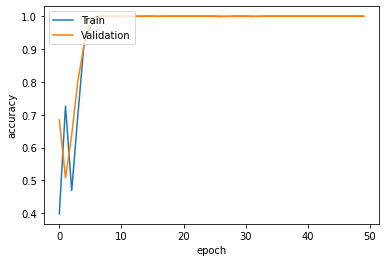

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Dự đoán là:  Hoa


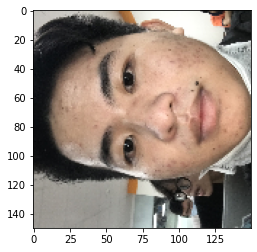

In [19]:
img = load_img('/content/drive/MyDrive/FaceID/predict/IMG_2140.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = [ 'Dat', 'Hoa','Thieu','Trung','Truong']
print('Dự đoán là: ',Label[int(np.argmax(model_Final.predict(img),axis=-1))])

In [20]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import datetime
import pandas as pd

In [21]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


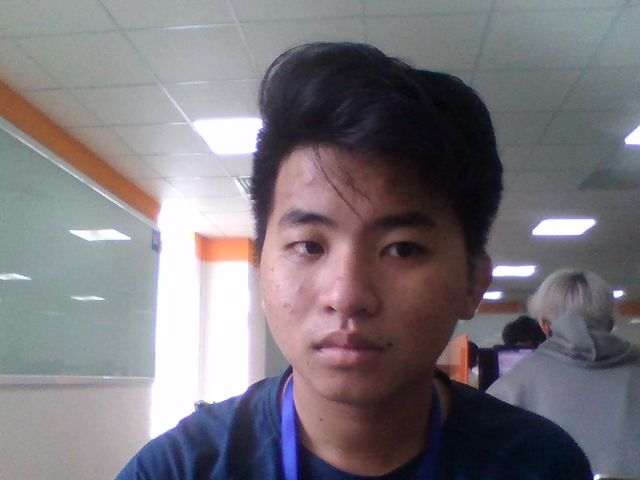

In [22]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Dự đoán là:  Hoa


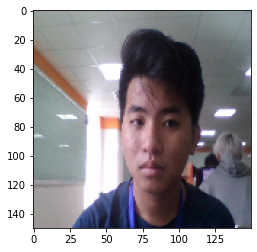

In [24]:
img=load_img(filename,target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Dat', 'Hoa', 'Tinh','Trung','Truong']
print('Dự đoán là: ',Label[int(np.argmax(model_Final.predict(img),axis=-1))])